## **Analytical Questions - What is the overall economic health of Americans?**
1.  **How much liquidity do Americans have?**
2.	What does disposable income look like for Americans over time? What is the comparison between ‘poor’ and ‘wealthy' areas(s)/region(s). Can I normalize the overall dataset with this approach–maybe I can use an overlay of cities and towns, etc..?
3. **What are people’s spending habits? how are people spending over time, more or less?** 
4. Can I use this to help better understand trends like housing, food, healthcare spending, etc. What are Americans doing with their disposable income?
4.	 **Are Americans enjoying economic growth over time? Or are there economic decline in earnings?**
--------------------------------------------------------------------------------------------------------------------
- (JC): How does income correlate with specific components of the cost of living (e.g., housing affordability, food prices)? 
- (JC): Have certain components of the cost of living increased at a faster rate than income in some areas? 
- (JD): How did import/export volumes fluctuate monthly across major East Coast ports in 2024?
- (FL): **How are people spending over time, more or less?**
- (FL): **How much disposable income do Americans have over time?** 
- (FL): **What does the cost of living look like for North Americans?** 
- **Note:** I'll be using one or two of these question in my EDA. And the following questions below 




In [1]:
# Import necessary libraries
from scipy.stats import pearsonr # for correlation calculation
import pandas as pd # for data manipulation using DataFrames
import numpy as np # for numerical operations 

import seaborn as sns # for data visualization 
import matplotlib.pyplot as plt # for data visualization
import matplotlib.ticker as xticks # for axis formatting
import plotly.express as px # for interactive plots
import math # for mathematical operations not found in numpy or native python...

In [4]:
# Load datasets
us_econ = pd.read_csv("../data/US_Macro_Micro_Index.csv", parse_dates=['DATE'])
world_col = pd.read_csv("../data/Cost_of_Living_and_Income_Extended.csv", parse_dates=['Year'])


In [5]:
world_col.head()

,Country,Year,Average_Monthly_Income,Cost_of_Living,Housing_Cost_Percentage,Tax_Rate,Savings_Percentage,Healthcare_Cost_Percentage,Education_Cost_Percentage,Transportation_Cost_Percentage,Region
0,Australia,2013-01-01,3483.92,1106.07,32.09,27.50,1.74,18.23,6.94,17.19,Oceania
1,India,2019-01-01,7771.03,5422.78,25.21,29.30,3.35,17.21,12.42,9.90,Asia
2,Russia,2004-01-01,6991.30,3972.36,40.85,22.94,15.48,15.28,7.10,9.59,Europe
3,South Africa,2011-01-01,6628.04,6755.75,30.38,15.69,8.03,6.66,11.76,11.04,Africa
4,Brazil,2015-01-01,2434.27,2656.36,49.27,12.44,25.06,9.34,3.63,15.09,South America


In [8]:
world_col.describe()

,Year,Average_Monthly_Income,Cost_of_Living,Housing_Cost_Percentage,Tax_Rate,Savings_Percentage,Healthcare_Cost_Percentage,Education_Cost_Percentage,Transportation_Cost_Percentage
count,500,500.000000,500.00000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000
mean,2011-07-07 20:09:36,4291.248240,3716.23212,34.973700,22.400900,14.92708,12.381820,8.408440,12.475940
min,2000-01-01 00:00:00,534.740000,432.60000,20.100000,5.000000,0.00000,5.010000,2.000000,5.060000
25%,2005-01-01 00:00:00,2322.360000,1967.79000,27.235000,14.742500,7.52500,8.487500,5.285000,8.752500
50%,2012-01-01 00:00:00,4391.585000,3803.20500,35.170000,22.275000,14.95000,12.365000,8.245000,12.665000
75%,2018-01-01 00:00:00,6233.757500,5265.96750,42.567500,30.905000,22.42750,16.222500,11.595000,15.952500
max,2023-01-01 00:00:00,7984.510000,6996.13000,49.950000,39.920000,29.84000,19.990000,14.940000,19.970000
std,NaN,2179.217333,1922.16053,8.657032,10.025412,8.81321,4.269823,3.775455,4.219147


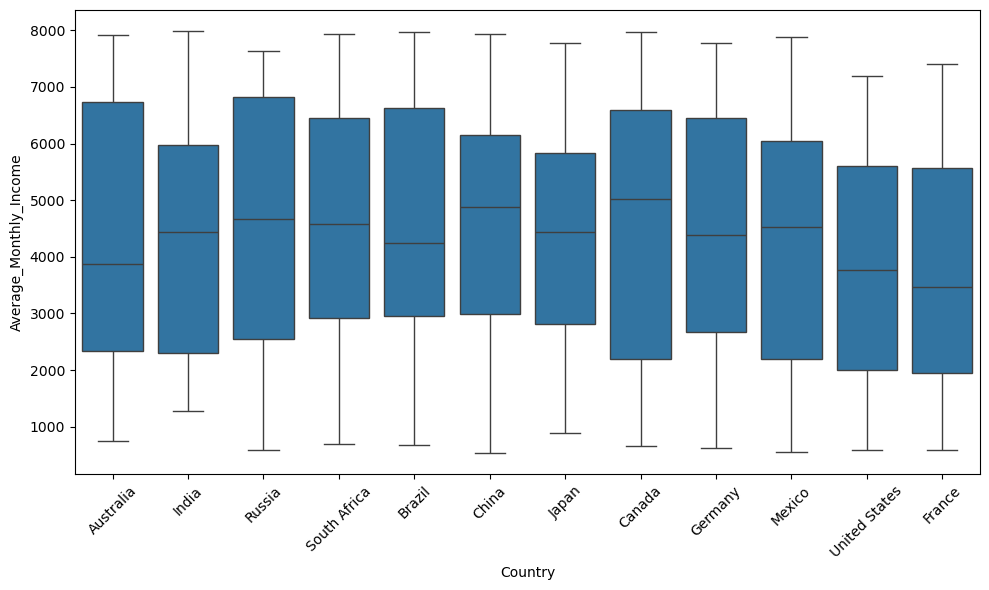

In [7]:
# Box plot of Countries vs. Average Monthly Income 
plt.figure(figsize=(10,6))
sns.boxplot(data=world_col,x="Country", y="Average_Monthly_Income")
plt.xticks(rotation=45)
plt.tight_layout()